In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [ ]:

san = pd.read_csv('flight_data_SAN.csv')
#summary statistics
print(san.describe())
#checking for null values
print(san.isna().sum())
                     

            flightno  totalseatcount        airtime        taxiout  \
count  188525.000000    188525.00000  187259.000000  187413.000000   
mean     2230.168689       144.30030     128.194640      16.507163   
std      1861.250646        37.35904      84.730699       7.477859   
min         4.000000        50.00000    -879.000000       0.000000   
25%       754.000000       143.00000      62.000000      12.000000   
50%      1702.000000       143.00000     107.000000      15.000000   
75%      3340.000000       172.00000     182.000000      19.000000   
max      8791.000000       294.00000    1744.000000    1039.000000   

              taxiin   depvariance    arrvariance  internationalflag  
count  186931.000000  188212.00000  188116.000000      188525.000000  
mean        7.883417       7.82245       3.684317           0.028951  
std         6.586859      35.24209      36.490056           0.167669  
min         1.000000    -439.00000    -417.000000           0.000000  
25%         5.

In [ ]:
df = pd.read_csv('san_data.csv')
df.head()


,ID,actual_departure_dttm,taxiout,act_depdate
0,1,1/1/2018 13:03,34,1/2018
1,2,1/1/2018 22:30,12,1/2018
2,3,1/1/2018 9:37,14,1/2018
3,4,1/1/2018 19:53,15,1/2018
4,5,1/1/2018 15:15,14,1/2018


In [ ]:
df['actual_departure_dttm'] = pd.to_datetime(df['actual_departure_dttm'])
taxiout = df.groupby('actual_departure_dttm')['taxiout'].mean().reset_index()
taxiout = taxiout.set_index('actual_departure_dttm')


In [ ]:
taxiout.head()

,taxiout
actual_departure_dttm,
2017-01-01 06:13:00,18.0
2017-01-01 06:14:00,19.5
2017-01-01 06:15:00,27.0
2017-01-01 06:21:00,16.0
2017-01-01 06:25:00,21.0


In [ ]:
y = taxiout['taxiout'].resample('MS').mean()

In [ ]:
y.head(30)

actual_departure_dttm
2017-01-01    15.740188
2017-02-01    15.437750
2017-03-01    15.285317
2017-04-01    14.984649
2017-05-01    15.298120
2017-06-01    16.424871
2017-07-01    16.427883
2017-08-01    17.055567
2017-09-01    15.929835
2017-10-01    15.944201
2017-11-01    15.979284
2017-12-01    15.964677
2018-01-01    16.633671
2018-02-01    16.017192
2018-03-01    16.201317
2018-04-01    16.187520
2018-05-01    16.308223
2018-06-01    16.487716
2018-07-01    17.445990
2018-08-01    17.296284
2018-09-01    17.186629
2018-10-01    17.282291
2018-11-01    16.878216
2018-12-01    16.642812
Freq: MS, Name: taxiout, dtype: float64

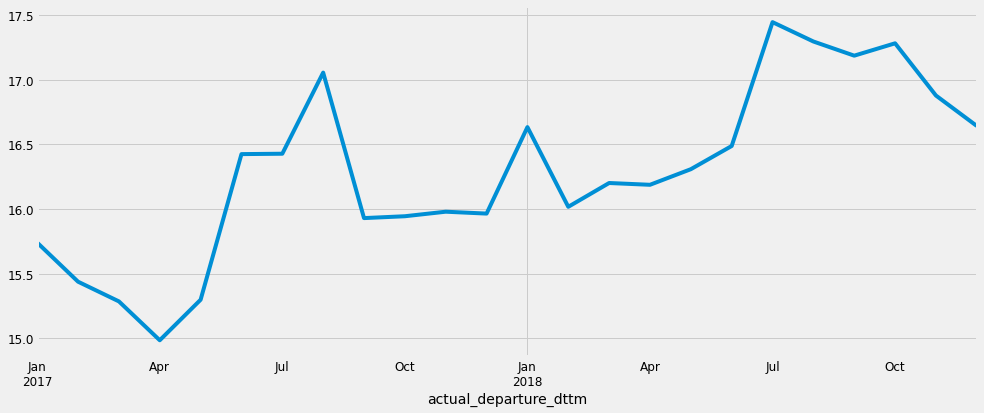

In [ ]:
y.plot(figsize=(15, 6))
plt.show()

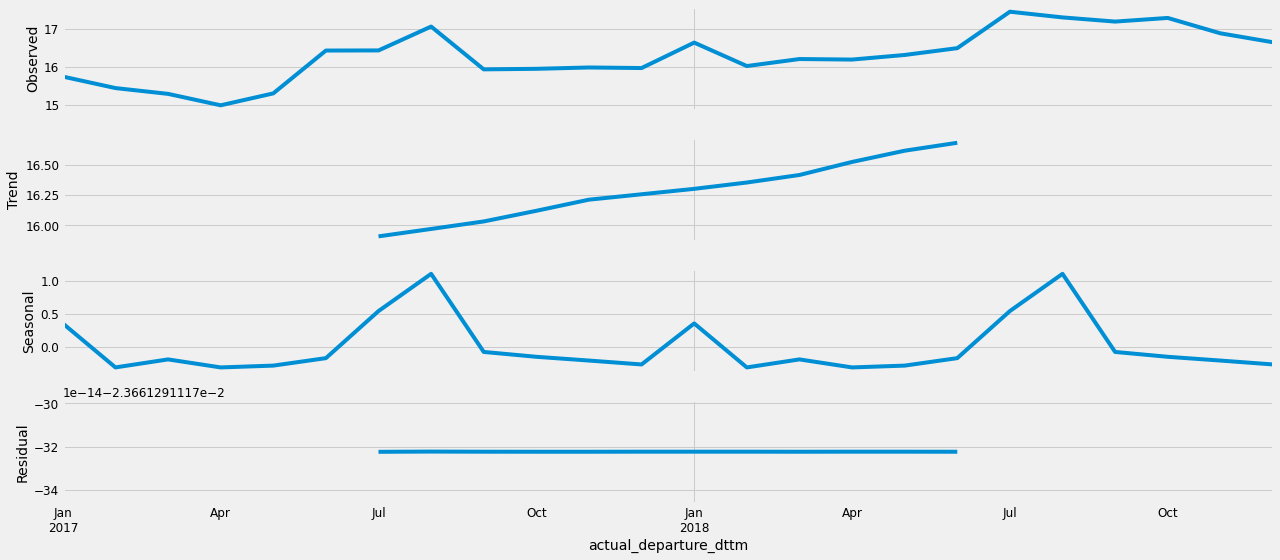

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
p = d = q = range(0, 4)
pdq = list(itertools.product(p, d, q))

In [ ]:
for param in pdq:
  
    try:
      mod = sm.tsa.statespace.SARIMAX(y,order=param,enforce_stationarity=False, enforce_invertibility=False)
      results = mod.fit()
      print('ARIMA{} - AIC:{}'.format(param, results.aic))
    except:
            continue

ARIMA(0, 0, 0) - AIC:195.75262261280642
ARIMA(0, 0, 1) - AIC:162.9571678980917
ARIMA(0, 0, 2) - AIC:137.08835133298976
ARIMA(0, 0, 3) - AIC:115.94939969134828
ARIMA(0, 1, 0) - AIC:32.841860769764644
ARIMA(0, 1, 1) - AIC:33.80079703646389
ARIMA(0, 1, 2) - AIC:34.903566184669685
ARIMA(0, 1, 3) - AIC:33.90197895155493
ARIMA(0, 2, 0) - AIC:49.962616979506464
ARIMA(0, 2, 1) - AIC:36.13804395738693
ARIMA(0, 2, 2) - AIC:35.93945516340905
ARIMA(0, 2, 3) - AIC:31.92232013852891
ARIMA(0, 3, 0) - AIC:72.09512624100932
ARIMA(0, 3, 1) - AIC:50.85418521706904
ARIMA(0, 3, 2) - AIC:39.29975179883932
ARIMA(0, 3, 3) - AIC:37.763315107419245
ARIMA(1, 0, 0) - AIC:35.518591917126585
ARIMA(1, 0, 1) - AIC:35.917970362213346
ARIMA(1, 0, 2) - AIC:34.46497710871004
ARIMA(1, 0, 3) - AIC:33.643595016900164
ARIMA(1, 1, 0) - AIC:34.33319432059754
ARIMA(1, 1, 1) - AIC:35.56082516300063
ARIMA(1, 1, 2) - AIC:36.55553313219255
ARIMA(1, 1, 3) - AIC:34.98159526220172
ARIMA(1, 2, 0) - AIC:41.843585924161815
ARIMA(1, 2, 1)

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(3,1,2),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2734      0.363      0.752      0.452      -0.439       0.986
ar.L2         -0.2767      0.272     -1.017      0.309      -0.810       0.256
ar.L3         -0.4431      0.192     -2.305      0.021      -0.820      -0.066
ma.L1         -0.6498   3299.419     -0.000      1.000   -6467.393    6466.093
ma.L2          1.0000   1.02e+04   9.85e-05      1.000   -1.99e+04    1.99e+04
sigma2         0.1178   1195.791   9.85e-05      1.000   -2343.590    2343.825


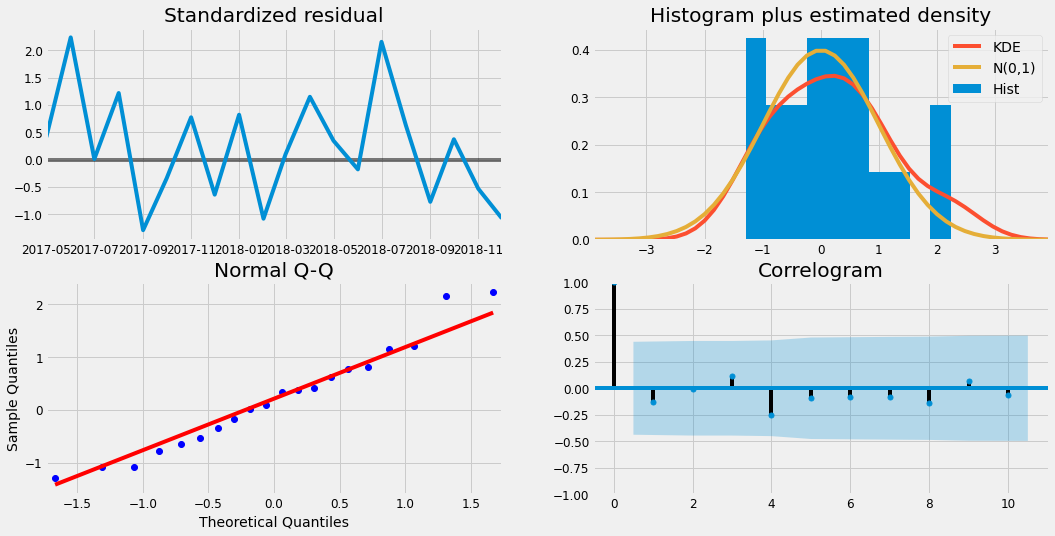

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                taxiout   No. Observations:                   24
Model:               SARIMAX(3, 1, 2)   Log Likelihood                  -9.440
Date:                Wed, 06 Apr 2022   AIC                             30.880
Time:                        00:22:43   BIC                             36.855
Sample:                    01-01-2017   HQIC                            32.047
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2734      0.363      0.752      0.452      -0.439       0.986
ar.L2         -0.2767      0.272     -1.017      0.309      -0.810       0.256
ar.L3         -0.4431      0.192     -2.305      0.021      -0.820      -0.066
ma.L1         -0.6498   3299.419     -0.000      1.000   -6467.393    6466.093
ma.L2          1.0000   1.02e+04   9.85e-05      1.000   -1.99e+04    1.99e+04
sigma2         0.1178   1195.791   9.85e-05      1.000   -2343.590    2343.825
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 0.80
Prob(Q):                               nan   Prob(JB):                         0.67
Heteroskedasticity (H):               0.80   Skew:                             0.42
Prob(H) (two-sided):                  0.78   Kurtosis:                         2.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

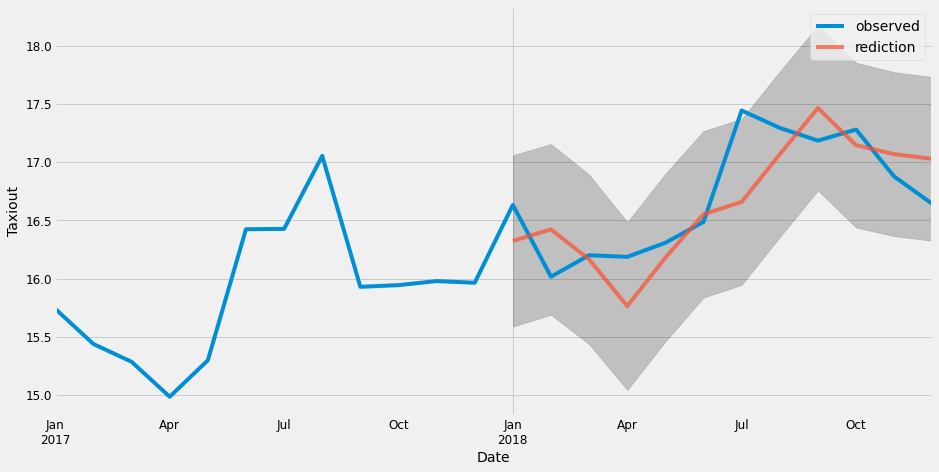

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='rediction', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Taxiout')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.12


In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.34


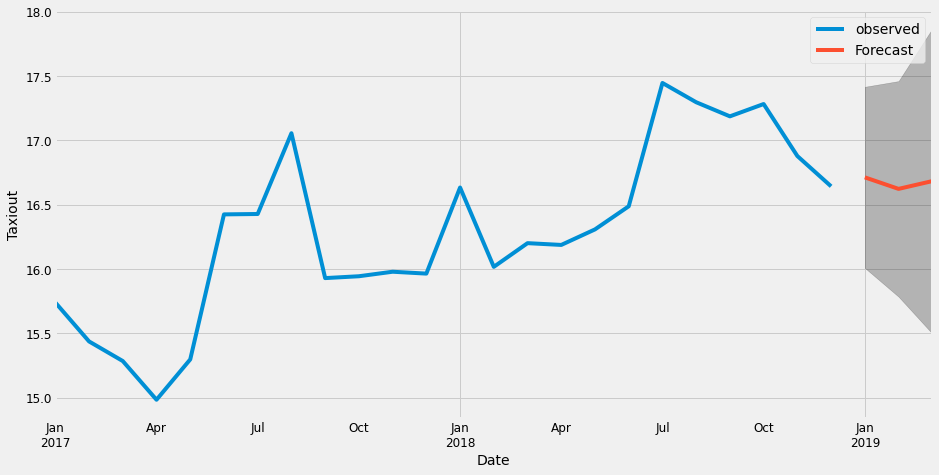

In [ ]:
pred_uc = results.get_forecast(steps=3)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Taxiout')
plt.legend()
plt.show()

In [ ]:
pred_uc.predicted_mean

2019-01-01    16.712616
2019-02-01    16.623003
2019-03-01    16.683487
Freq: MS, dtype: float64

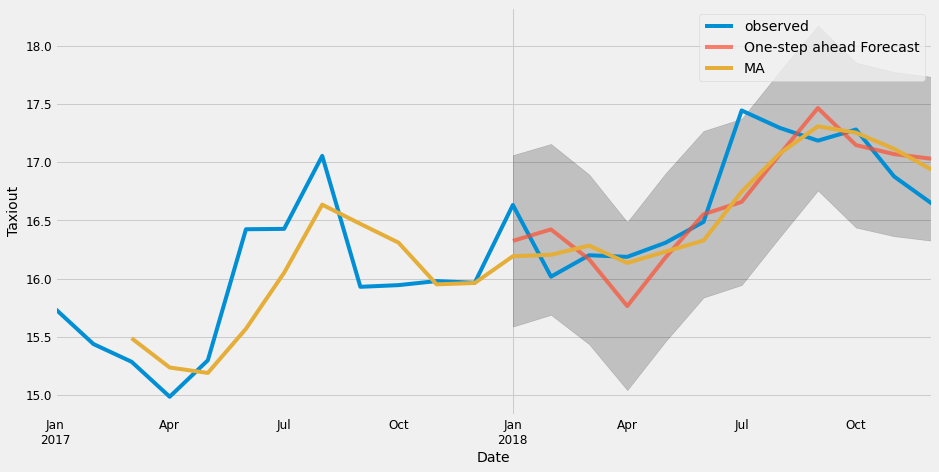

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ma_forecast = y.rolling(3).mean()
ax = y['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ma_forecast.plot(ax=ax, label ='MA')
ax.set_xlabel('Date')
ax.set_ylabel('Taxiout')
plt.legend()
plt.show()


In [ ]:
ma_mse = ((ma_forecast - y) ** 2).mean()
print('The Mean Squared Error of Moving Average forecasts is {}'.format(round(ma_mse, 2)))

The Mean Squared Error of our forecasts is 0.12
